In [1]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [17]:
import pandas as pd

# Caminho base
base_path = '/content/drive/MyDrive/TRABALHO IA/'

# Nomes dos arquivos
arquivo1 = base_path + 'PIADAS-SEPARADAS.csv'
arquivo2 = base_path + 'PIADAS.csv'

# Carregar os CSVs
df1 = pd.read_csv(arquivo1)
df2 = pd.read_csv(arquivo2)

print("Arquivos carregados com sucesso!")


Arquivos carregados com sucesso!


In [3]:
print(df1.head())
print(df2.head())

   ID                                              SETUP  \
0   1                        Como deixar alguém curioso?   
1   2  Por que os fantasmas são péssimos para contar ...   
2   3  Por que a plantinha não foi atendida no hospital?   
3   4  Se você está se sentindo sozinho, abandonado, ...   
4   5  - Doutor, como eu faço para emagrecer? - Basta...   

                                        PUNCH  
0                            Eu conto amanhã.  
1                   Porque são transparentes.  
2          Porque só tinha médico de plantão.  
3                        Atrase um pagamento.  
4   Todas as vezes que lhe oferecerem comida.  
   ID                                              PIADA
0   1       Como deixar alguém curioso? Eu conto amanhã.
1   2  Por que os fantasmas são péssimos para contar ...
2   3  Por que a plantinha não foi atendida no hospit...
3   4  Se você está se sentindo sozinho, abandonado, ...
4   5  - Doutor, como eu faço para emagrecer? - Basta...


In [6]:
# Juntar os dois dataframes pela coluna ID
df3 = pd.merge(df1, df2, on='ID', how='inner')

# Visualizar o resultado
print(df3.head())

# (opcional) salvar no drive
df3.to_csv('/content/drive/MyDrive/TRABALHO IA/piadas_completas.csv', index=False)

   ID                                              SETUP  \
0   1                        Como deixar alguém curioso?   
1   2  Por que os fantasmas são péssimos para contar ...   
2   3  Por que a plantinha não foi atendida no hospital?   
3   4  Se você está se sentindo sozinho, abandonado, ...   
4   5  - Doutor, como eu faço para emagrecer? - Basta...   

                                        PUNCH  \
0                            Eu conto amanhã.   
1                   Porque são transparentes.   
2          Porque só tinha médico de plantão.   
3                        Atrase um pagamento.   
4   Todas as vezes que lhe oferecerem comida.   

                                               PIADA  
0       Como deixar alguém curioso? Eu conto amanhã.  
1  Por que os fantasmas são péssimos para contar ...  
2  Por que a plantinha não foi atendida no hospit...  
3  Se você está se sentindo sozinho, abandonado, ...  
4  - Doutor, como eu faço para emagrecer? - Basta...  


In [7]:
# ==========================================
# 2️⃣ ANÁLISE EXPLORATÓRIA DE DADOS (EDA)
# ==========================================

# Informações básicas do dataset
print("Informações do dataset:")
print(df3.info())
print("\nEstatísticas básicas:")
print(df3.describe(include='all'))

# Verificar valores nulos
print("\nValores nulos por coluna:")
print(df3.isnull().sum())

# Quantidade total de piadas
print(f"\nTotal de piadas: {len(df3)}")

# Tamanho médio das frases (em caracteres)
df3['len_setup'] = df3['SETUP'].str.len()
df3['len_punch'] = df3['PUNCH'].str.len()
df3['len_piadas'] = df3['PIADA'].str.len()

print("\nTamanho médio das frases:")
print(df3[['len_setup', 'len_punch', 'len_piadas']].mean())

# Proporção média do setup em relação à piada completa
df3['ratio_setup_punch'] = df3['len_setup'] / (df3['len_punch'] + 1)  # evitar divisão por 0
print("\nProporção média (setup/punch):")
print(df3['ratio_setup_punch'].mean())


Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 431 entries, 0 to 430
Data columns (total 4 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   ID      431 non-null    int64 
 1   SETUP   431 non-null    object
 2   PUNCH   431 non-null    object
 3   PIADA   431 non-null    object
dtypes: int64(1), object(3)
memory usage: 13.6+ KB
None

Estatísticas básicas:
                ID                                       SETUP       PUNCH  \
count   431.000000                                         431         431   
unique         NaN                                         419         424   
top            NaN  Qual é o alimento mais sagrado que existe?   H Deus O.   
freq           NaN                                           3           2   
mean    216.000000                                         NaN         NaN   
std     124.563237                                         NaN         NaN   
min       1.000000             

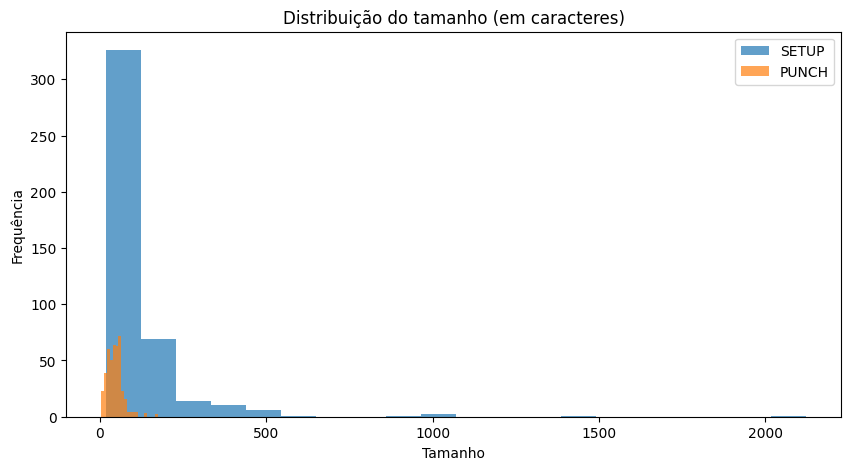

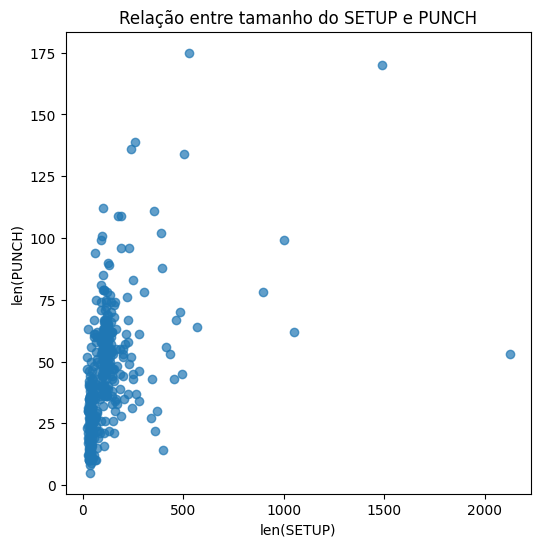

In [8]:
# ==========================================
# 3️⃣ VISUALIZAÇÕES INICIAIS
# ==========================================

import matplotlib.pyplot as plt

# Histograma do tamanho dos setups e punches
plt.figure(figsize=(10,5))
plt.hist(df3['len_setup'], bins=20, alpha=0.7, label='SETUP')
plt.hist(df3['len_punch'], bins=20, alpha=0.7, label='PUNCH')
plt.legend()
plt.title("Distribuição do tamanho (em caracteres)")
plt.xlabel("Tamanho")
plt.ylabel("Frequência")
plt.show()

# Relação entre tamanho do setup e punch
plt.figure(figsize=(6,6))
plt.scatter(df3['len_setup'], df3['len_punch'], alpha=0.7)
plt.title("Relação entre tamanho do SETUP e PUNCH")
plt.xlabel("len(SETUP)")
plt.ylabel("len(PUNCH)")
plt.show()


In [11]:
!pip install Unidecode

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 235.8/235.8 kB 18.0 MB/s eta 0:00:00


In [12]:
# ==========================================
# 4️⃣ PRÉ-PROCESSAMENTO DE TEXTO
# ==========================================

import re
from unidecode import unidecode

def limpar_texto(texto):
    if pd.isnull(texto):
        return ""
    texto = texto.lower()  # letras minúsculas
    texto = unidecode(texto)  # remove acentuação
    texto = re.sub(r'[^a-z0-9\s\?\!\.\-]', '', texto)  # remove caracteres especiais
    texto = re.sub(r'\s+', ' ', texto).strip()  # remove espaços extras
    return texto

# Aplicar limpeza
df3['setup_limpo'] = df3['SETUP'].apply(limpar_texto)
df3['punch_limpo'] = df3['PUNCH'].apply(limpar_texto)

# Visualizar exemplo
df3[['SETUP', 'setup_limpo', 'PUNCH', 'punch_limpo']].head()


,SETUP,setup_limpo,PUNCH,punch_limpo
0,Como deixar alguém curioso?,como deixar alguem curioso?,Eu conto amanhã.,eu conto amanha.
1,Por que os fantasmas são péssimos para contar ...,por que os fantasmas sao pessimos para contar ...,Porque são transparentes.,porque sao transparentes.
2,Por que a plantinha não foi atendida no hospital?,por que a plantinha nao foi atendida no hospital?,Porque só tinha médico de plantão.,porque so tinha medico de plantao.
3,"Se você está se sentindo sozinho, abandonado, ...",se voce esta se sentindo sozinho abandonado ac...,Atrase um pagamento.,atrase um pagamento.
4,"- Doutor, como eu faço para emagrecer? - Basta...",- doutor como eu faco para emagrecer? - basta ...,Todas as vezes que lhe oferecerem comida.,todas as vezes que lhe oferecerem comida.


In [13]:
# ==========================================
# 5️⃣ FEATURE ENGINEERING
# ==========================================

# Quantidade de palavras
df3['n_palavras_setup'] = df3['setup_limpo'].apply(lambda x: len(x.split()))
df3['n_palavras_punch'] = df3['punch_limpo'].apply(lambda x: len(x.split()))

# Contagem de caracteres não alfabéticos
df3['carac_nao_alfab_setup'] = df3['setup_limpo'].apply(lambda x: len(re.findall(r'[^a-z\s]', x)))
df3['carac_nao_alfab_punch'] = df3['punch_limpo'].apply(lambda x: len(re.findall(r'[^a-z\s]', x)))

# Detectar presença de ponto de interrogação e traço
df3['tem_pergunta'] = df3['SETUP'].str.contains(r'\?', regex=True)
df3['tem_dialogo'] = df3['SETUP'].str.contains(r'\-', regex=True)

# Diversidade lexical
df3['diversidade_lexical'] = df3['setup_limpo'].apply(
    lambda x: len(set(x.split())) / (len(x.split()) + 1)
)

# Visualizar novas colunas
df3[['ID', 'n_palavras_setup', 'n_palavras_punch', 'carac_nao_alfab_setup',
     'tem_pergunta', 'tem_dialogo', 'diversidade_lexical']].head()


,ID,n_palavras_setup,n_palavras_punch,carac_nao_alfab_setup,tem_pergunta,tem_dialogo,diversidade_lexical
0,1,4,3,1,True,False,0.800000
1,2,9,3,1,True,False,0.900000
2,3,9,6,1,True,False,0.900000
3,4,13,3,3,False,False,0.857143
4,5,30,7,7,True,True,0.645161


                   len_setup  len_punch  len_piadas  ratio_setup_punch
len_setup           1.000000   0.422303    0.965495           0.794989
len_punch           0.422303   1.000000    0.501946          -0.029107
len_piadas          0.965495   0.501946    1.000000           0.723629
ratio_setup_punch   0.794989  -0.029107    0.723629           1.000000


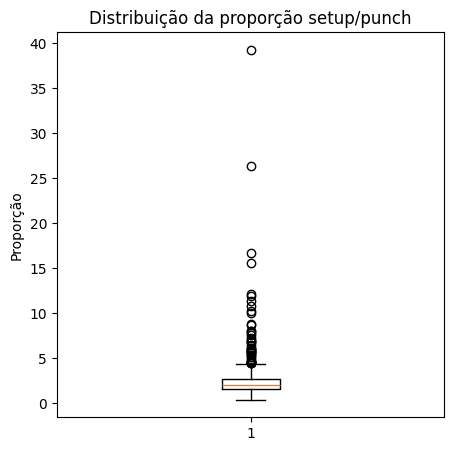


Piadas com pergunta no setup:
tem_pergunta
True     383
False     48
Name: count, dtype: int64


In [14]:
# ==========================================
# 6️⃣ CORRELAÇÕES E INSIGHTS
# ==========================================

# Correlação entre tamanhos
print(df3[['len_setup', 'len_punch', 'len_piadas', 'ratio_setup_punch']].corr())

# Boxplot da proporção setup/punch
plt.figure(figsize=(5,5))
plt.boxplot(df3['ratio_setup_punch'])
plt.title("Distribuição da proporção setup/punch")
plt.ylabel("Proporção")
plt.show()

# Quantas piadas são perguntas?
print("\nPiadas com pergunta no setup:")
print(df3['tem_pergunta'].value_counts())


In [15]:
# ==========================================
# 7️⃣ ALGORITMO BASE – CLASSIFICAÇÃO
# ==========================================

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

# Criar dataset com as duas categorias
setups = pd.DataFrame({'texto': df3['setup_limpo'], 'tipo': 'setup'})
punches = pd.DataFrame({'texto': df3['punch_limpo'], 'tipo': 'punch'})
dados = pd.concat([setups, punches])

# Divisão treino/teste
X_train, X_test, y_train, y_test = train_test_split(
    dados['texto'], dados['tipo'], test_size=0.2, random_state=42
)

# Vetorização TF-IDF
vectorizer = TfidfVectorizer(max_features=2000)
X_train_vec = vectorizer.fit_transform(X_train)
X_test_vec = vectorizer.transform(X_test)

# Modelo base: Regressão Logística
modelo = LogisticRegression(max_iter=1000)
modelo.fit(X_train_vec, y_train)

# Avaliação
pred = modelo.predict(X_test_vec)
print("Acurácia:", accuracy_score(y_test, pred))
print("\nRelatório de Classificação:")
print(classification_report(y_test, pred))


Acurácia: 0.8959537572254336

Relatório de Classificação:
              precision    recall  f1-score   support

       punch       0.94      0.85      0.89        88
       setup       0.86      0.94      0.90        85

    accuracy                           0.90       173
   macro avg       0.90      0.90      0.90       173
weighted avg       0.90      0.90      0.90       173



In [16]:
# ==========================================
# 8️⃣ SALVAR DATAFRAME FINAL
# ==========================================

output_path = '/content/drive/MyDrive/TRABALHO IA/piadas_features.csv'
df3.to_csv(output_path, index=False)
print(f"Arquivo salvo em: {output_path}")


Arquivo salvo em: /content/drive/MyDrive/Atividade Cleon/TRABALHO IA/piadas_features.csv
